In [1]:
import spacy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from tqdm import tqdm, trange 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from confusion_matrix_plot import plot_confusion_matrix
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
np.set_printoptions(precision=2)

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [6]:
test

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...
5,id27337,"""The thick and peculiar mist, or smoke, which ..."
6,id24265,"That which is not matter, is not at all unless..."
7,id25917,I sought for repose although I did not hope fo...
8,id04951,"Upon the fourth day of the assassination, a pa..."
9,id14549,"""The tone metaphysical is also a good one."


In [14]:
labels = LabelEncoder()
labels.fit(train['author'])

LabelEncoder()

([<matplotlib.axis.XTick at 0x1c23aa38f98>,
 <a list of 3 Text xticklabel objects>)

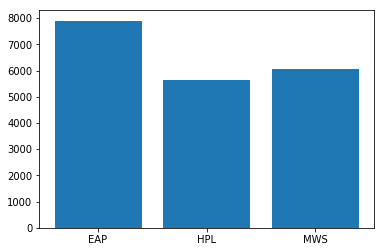

In [7]:
D = Counter(train['author'])
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

In [8]:
nlp.meta

{'accuracy': {'ents_f': 85.2975560875,
  'ents_p': 84.9664503965,
  'ents_r': 85.6312524451,
  'las': 89.800872413,
  'tags_acc': 97.0403350292,
  'token_acc': 99.8698372794,
  'uas': 91.7237657538},
 'author': 'Explosion AI',
 'description': 'English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.',
 'email': 'contact@explosion.ai',
 'lang': 'en',
 'license': 'CC BY-SA 3.0',
 'name': 'core_web_sm',
 'parent_package': 'spacy',
 'pipeline': ['tagger', 'parser', 'ner'],
 'sources': ['OntoNotes 5', 'Common Crawl'],
 'spacy_version': '>=2.0.0a18',
 'speed': {'cpu': 5122.3040471407, 'gpu': None, 'nwords': 291344},
 'url': 'https://explosion.ai',
 'vectors': {'keys': 0, 'vectors': 0, 'width': 0},
 'version': '2.0.0'}

In [9]:
emb_dim = nlp('why not in meta?').vector.shape[0]

In [10]:
naive_vectors = np.load('naive_vectors.npy')
"""
naive_vectors = np.zeros((len(train),emb_dim))
for i,line in enumerate(tqdm(train['text'])):
    naive_vectors[i] = nlp(line).vector
np.save('naive_vectors',naive_vectors)
"""

"\nnaive_vectors = np.zeros((len(train),emb_dim))\nfor i,line in enumerate(tqdm(train['text'])):\n    naive_vectors[i] = nlp(line).vector\nnp.save('naive_vectors',naive_vectors)\n"

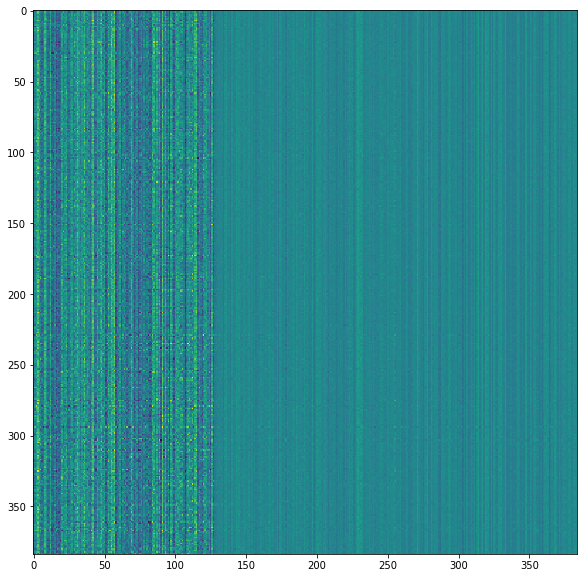

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(naive_vectors[:emb_dim])

In [12]:
def visualize(vectors):
    pca = PCA(n_components=2)
    vis = pca.fit_transform(vectors)
    plt.figure(figsize=(10,10))
    plt.scatter(vis.T[0], vis.T[1],marker='.',c=labels.transform(train['author']))
    return 0

0

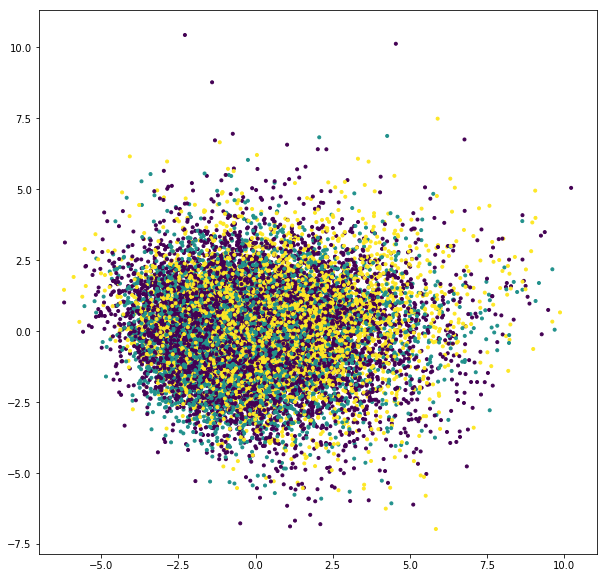

In [15]:
visualize(naive_vectors)

In [39]:
def classify(vectors):
    skf = StratifiedKFold(n_splits=3,shuffle=True)

    for train_index, test_index in skf.split(vectors, train['author']):
        print('new iteration')
        mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100),verbose=2)
        mlp.fit(vectors[train_index],train['author'][train_index])
        cnf_matrix = confusion_matrix(train['author'][test_index], mlp.predict(vectors[test_index]))
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=labels.classes_, normalize=True,
                          title='Normalized confusion matrix')

new iteration
Normalized confusion matrix
[[ 0.72  0.13  0.15]
 [ 0.21  0.66  0.13]
 [ 0.22  0.13  0.65]]
new iteration
Normalized confusion matrix
[[ 0.73  0.12  0.15]
 [ 0.23  0.63  0.14]
 [ 0.24  0.11  0.65]]
new iteration
Normalized confusion matrix
[[ 0.73  0.12  0.14]
 [ 0.21  0.64  0.15]
 [ 0.24  0.12  0.63]]


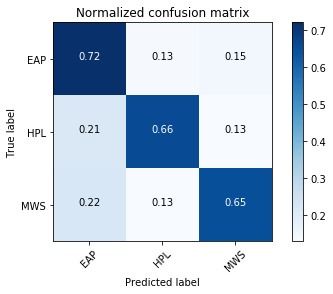

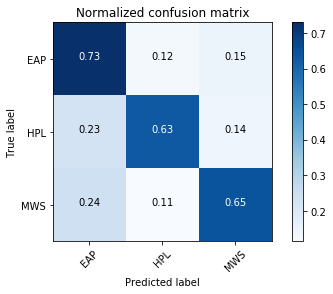

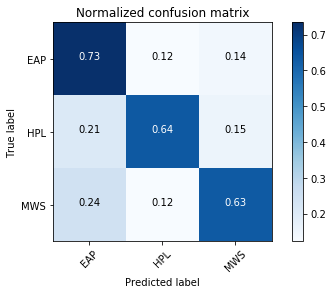

In [40]:
classify(naive_vectors)

In [16]:
tfidf = TfidfVectorizer(max_features=1000)

In [17]:
tfidf_vectors = tfidf.fit_transform(train['text'])

In [18]:
tfidf_vectors.shape

(19579, 1000)

0

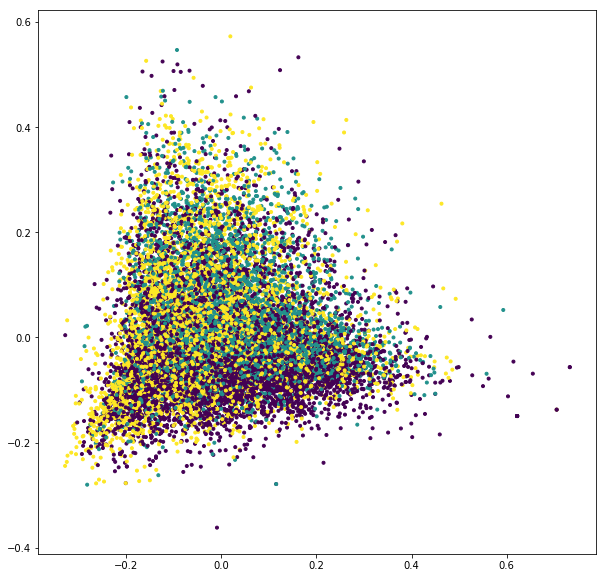

In [19]:
visualize(tfidf_vectors.toarray())

new iteration
Normalized confusion matrix
[[ 0.74  0.14  0.12]
 [ 0.2   0.7   0.1 ]
 [ 0.2   0.1   0.7 ]]
new iteration
Normalized confusion matrix
[[ 0.71  0.16  0.13]
 [ 0.2   0.7   0.1 ]
 [ 0.18  0.12  0.7 ]]
new iteration
Normalized confusion matrix
[[ 0.75  0.12  0.13]
 [ 0.22  0.68  0.11]
 [ 0.19  0.1   0.7 ]]


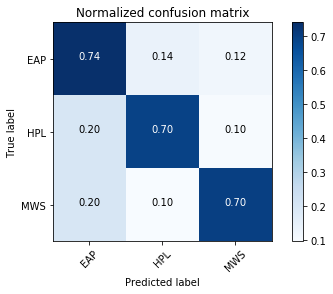

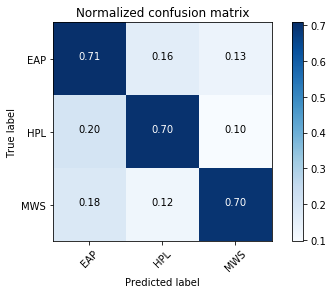

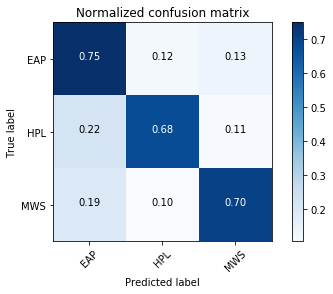

In [41]:
classify(tfidf_vectors)

In [21]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100),verbose=2)
mlp.fit(tfidf_vectors,train['author'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=2, warm_start=False)

In [24]:
prediction = mlp.predict_proba(tfidf.transform(test['text']))

In [27]:
submition = pd.DataFrame(columns=['id','EAP','HPL','MWS'])

In [28]:
submition['id'] = test['id']

In [32]:
prediction.shape

(8392, 3)

In [34]:
submition['EAP'] = prediction.T[0]
submition['HPL'] = prediction.T[1]
submition['MWS'] = prediction.T[2]

In [37]:
submition.to_csv('submition.csv')

In [25]:
prediction

array([[ 0.56,  0.  ,  0.43],
       [ 0.81,  0.19,  0.  ],
       [ 0.02,  0.97,  0.  ],
       ..., 
       [ 0.25,  0.03,  0.73],
       [ 0.25,  0.02,  0.73],
       [ 0.27,  0.72,  0.01]])

In [26]:
with open('submition.csv','w') as f:
    for entry in prediction:
        f.write()

SyntaxError: unexpected EOF while parsing (<ipython-input-26-cd6cf1489c07>, line 1)

In [ ]:
submition_X = tfidf.transform(test['text'])

In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100),verbose=2)
mlp.fit(vectors[train_index],train['author'][train_index])

In [6]:
for i in range(10):
    print(train['author'][i],train['text'][i]+'\n')

EAP This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.

HPL It never once occurred to me that the fumbling might be a mere mistake.

EAP In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.

MWS How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.

HPL Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.

MWS A youth passed in solitude, my best years spent under your gentle and feminine foste